# NAMA: RICHKY ABEDNEGO

# NIM: 5312422025

# PRODI: TEKKOM 22

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

Import library dan menentukan setup ukuran dari penulisan dan penggambaran plot.

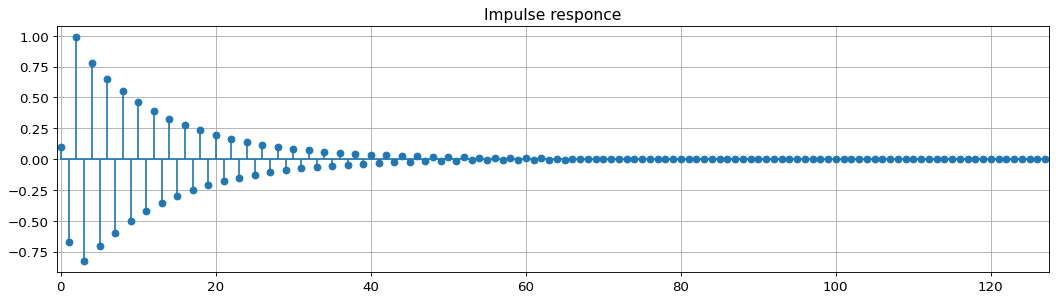

In [3]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Kode tersebut menampilkan plot respons impuls dari sistem filter FIR atau IIR yang ditentukan oleh koefisien \( b \) dan \( a \). Sebuah delta-function (impuls) dimasukkan ke dalam sistem filter menggunakan fungsi `lfilter` dari SciPy, yang menghasilkan respon impuls \( y1 \). Plot ini ditampilkan menggunakan Matplotlib dengan fungsi `stem`, yang menunjukkan amplitudo dari sinyal output pada titik-titik diskrit.

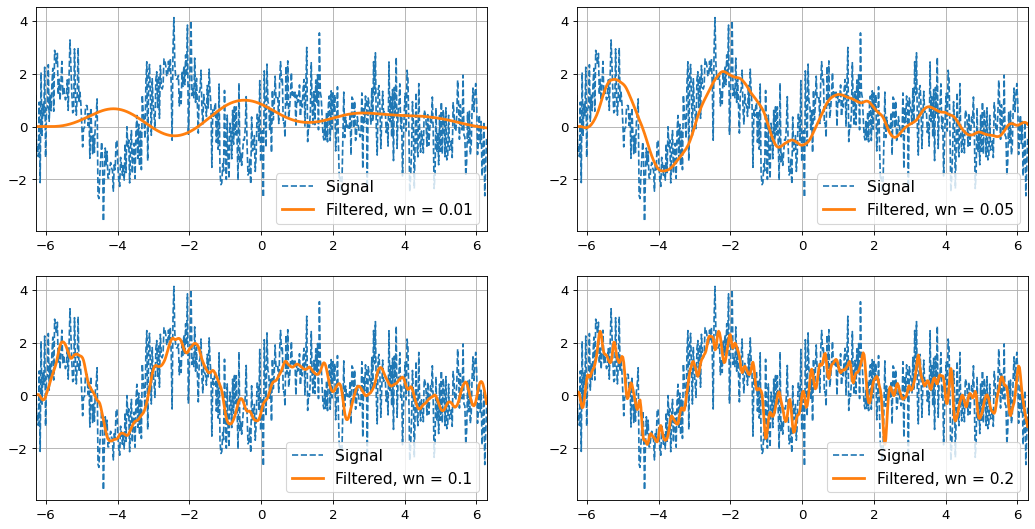

In [4]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')

Program di atas menghasilkan empat plot terpisah. Pertama, sinyal input \( x \) dibentuk dari gabungan dua gelombang sinusoidal bergantian dengan tambahan sedikit derau putih. Setelahnya, sinyal ini melewati filter low-pass Butterworth orde 3 dengan frekuensi cut-off 0.2 kali frekuensi Nyquist. Filter ini diterapkan pada sinyal asli, dan hasilnya ditampilkan dalam empat subplot yang berbeda. Setiap subplot mewakili hasil filtering menggunakan filter Butterworth dengan frekuensi cut-off yang bervariasi. Plot menampilkan sinyal asli (biru) dan hasil filtering (oranye) untuk setiap filter dengan frekuensi cut-off yang berbeda, memberikan gambaran tentang dampak filtering pada sinyal input yang kompleks.

Program tersebut memiliki langkah-langkah sebagai berikut:

1. Membuat sinyal input \( x \) dengan menggunakan kombinasi dari dua fungsi sinusoidal yang kompleks. Variabel \( t \) digunakan sebagai domain waktu dengan nilai yang dibuat dari rentang \( -\pi \) hingga \( \pi \).
   
2. Menambahkan sedikit derau putih ke dalam sinyal input \( x \) dengan menggunakan fungsi `np.random.randn()` untuk menghasilkan derau acak.

3. Membuat filter lowpass Butterworth orde 3 dengan frekuensi cut-off sebesar \( 0.2 \). Koefisien filter \( b \) dan \( a \) dihitung menggunakan fungsi `butter()` dari SciPy.

4. Mengaplikasikan filter lowpass yang telah dibuat ke sinyal input \( x \) menggunakan fungsi `lfilter()`, menghasilkan sinyal output \( z \).

5. Menghitung filter IIR tambahan dengan menggunakan Butterworth filter orde 3 untuk berbagai frekuensi cut-off yang telah ditentukan (\(0.01\), \(0.05\), \(0.1\), \(0.2\)). Setiap filter IIR diterapkan ke sinyal input \( x \) menggunakan fungsi `lfilter()`, dan hasilnya disimpan dalam matriks `zz`.

6. Memplot hasilnya menggunakan Matplotlib. Setiap subplot menunjukkan sinyal input dan hasil filtering untuk masing-masing filter IIR dengan frekuensi cut-off yang sesuai. Legenda ditambahkan untuk menunjukkan frekuensi cut-off dari setiap filter.

In [5]:
N = 40
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

Kode tersebut membandingkan dua pendekatan implementasi filter FIR. Pertama, sebuah delta-function (impuls) diterapkan ke filter FIR dengan koefisien b yang diisi dengan nilai satu dan koefisien a yang merupakan array satu. Pendekatan kedua mengubah filter FIR menjadi bentuk rekursif dengan koefisien b yang memiliki nilai satu pada indeks pertama dan nilai minus satu pada indeks terakhir, sedangkan koefisien a diisi dengan nilai satu dan minus satu. Hasil dari kedua pendekatan dibandingkan untuk memverifikasi apakah keduanya menghasilkan sinyal yang sama, dan hasilnya adalah True.


Kode di atas menguji perbedaan antara dua pendekatan dalam mengimplementasikan filter FIR. Pertama, sebuah delta-function (impuls) diterapkan ke filter FIR dengan menggunakan koefisien b yang diisi dengan nilai satu dan koefisien a yang merupakan array dengan satu elemen. Pendekatan kedua mengubah filter FIR menjadi bentuk rekursif dengan menetapkan koefisien b menjadi array yang memiliki nilai satu pada indeks pertama dan nilai minus satu pada indeks terakhir, sementara koefisien a diisi dengan dua nilai yaitu satu dan minus satu.

Hasil dari kedua pendekatan tersebut, y1 dan y2, dibandingkan untuk memverifikasi apakah keduanya menghasilkan sinyal yang sama. Hasil yang didapatkan adalah True.

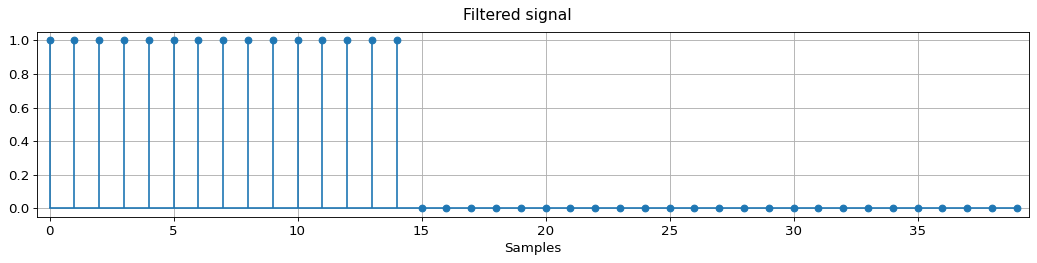

In [6]:
plt.figure(figsize=(16, 3), dpi=80)
plt.stem(y2, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)


Plot di atas memvisualisasikan hasil dari filter FIR yang diimplementasikan menggunakan fungsi `stem`, di mana amplitudo sinyal output pada titik-titik diskrit ditampilkan dengan menggunakan ujung bulat. Plot tersebut merepresentasikan sinyal output yang telah difilter dengan filter FIR \( f \). Pada sumbu x, jumlah sampel dari sinyal ditampilkan, sementara sumbu y menunjukkan amplitudo sinyal tersebut.

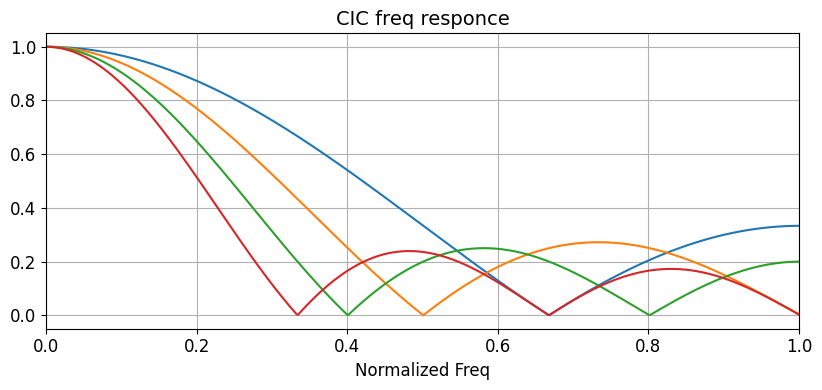

In [7]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

Program diatas menampilkan plot respons frekuensi dari filter CIC (Cascaded Integrator-Comb) dengan panjang pipa integrator sebesar 3. Dalam loop, filter CIC digunakan untuk menyaring sinyal input dengan panjang pipa integrator bertambah pada setiap iterasi. Gambar yang dihasilkan menampilkan respons frekuensi normalisasi dari filter CIC untuk setiap panjang pipa integrator, yang dihitung sebagai magnitudo dari respons frekuensi yang dinormalisasi dengan nilai maksimumnya.Kode di atas melakukan pemrosesan untuk menghasilkan plot respons frekuensi dari filter *Cascaded Integrator-Comb* (CIC). Ini adalah filter digital yang sering digunakan dalam aplikasi pemrosesan sinyal dan DSP (Digital Signal Processing) untuk mengekstrak informasi frekuensi dari sinyal.

Langkah-langkah pemrosesan kode ini adalah sebagai berikut:

1. Pertama-tama, nilai `N` ditetapkan sebagai 512, yang menentukan jumlah poin pada domain frekuensi.

2. Array frekuensi `f` dibuat dengan menggunakan fungsi `np.linspace(0, 1, N, endpoint=True)`. Ini menghasilkan nilai frekuensi yang sama jauhnya satu sama lain, mulai dari 0 hingga 1, yang direpresentasikan dalam domain frekuensi normalisasi.

3. Koefisien filter \( b \) ditetapkan sebagai [1, 1, 1], yang menunjukkan filter *CIC* dengan kinerja *comb filter*.

4. Sebuah figure dibuat dengan ukuran 16x4. Dalam figure tersebut, subplot pertama (subplot 1, 2, 1) diinisialisasi.

5. Loop `for` dijalankan untuk iterasi sebanyak empat kali. Pada setiap iterasi, respons frekuensi dari filter *CIC* dihitung menggunakan fungsi `freqz(b, N)`. Ini menghasilkan magnitude respons frekuensi (amplitudo respons frekuensi) dari filter *CIC* pada domain frekuensi normalisasi.

6. Magnitude respons frekuensi tersebut dinormalisasi dengan membaginya dengan nilai maksimumnya agar nilai puncaknya adalah 1. Ini dilakukan dengan menggunakan `h/np.max(h)`, yang membagi semua nilai magnitude dengan nilai maksimumnya.

7. Plot dilakukan dengan menggunakan `plt.plot(f, h/np.max(h))`, di mana sumbu x adalah array frekuensi normalisasi `f` dan sumbu y adalah magnitude respons frekuensi yang telah dinormalisasi. Setelah itu, batas sumbu x diatur antara 0 dan 1, dan grid diaktifkan.

8. Label sumbu x ditambahkan sebagai 'Normalized Freq', dan judul plot diberikan sebagai 'CIC freq responce'.

9. Penyusunan plot disempurnakan dengan `plt.tight_layout()` untuk memastikan tata letak yang rapi.

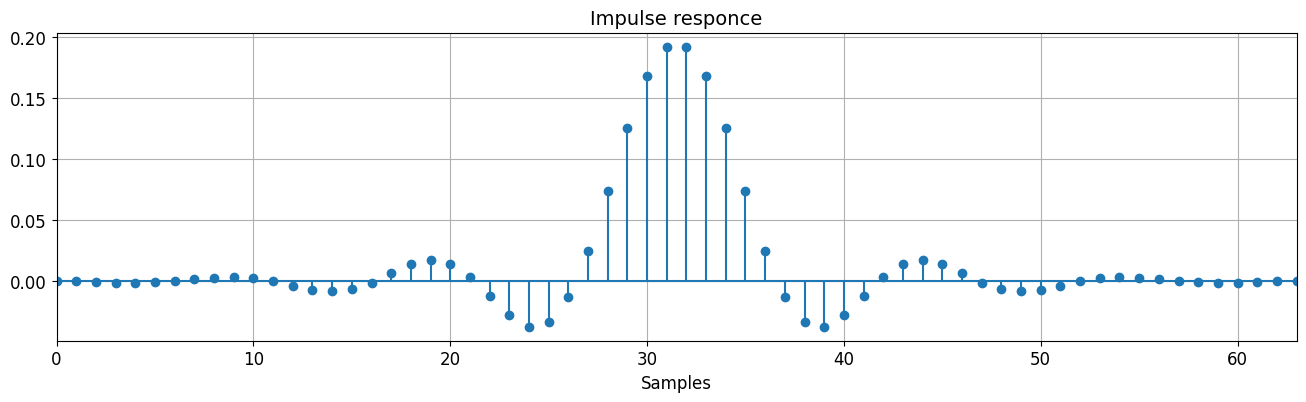

In [8]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse responce')
plt.stem(taps, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Kode tersebut menggunakan metode Parks-McClellan untuk mendefinisikan dan memplot filter FIR. Filter tersebut memiliki panjang 64, dan respons frekuensi yang diinginkan dijelaskan oleh dua array: `lst_freqs`, yang berisi daftar frekuensi yang diinginkan, dan `lst_gain`, yang menentukan gain di setiap frekuensi. Plot menampilkan respons impuls dari filter FIR yang dihasilkan. Di dalam plot, nilai koefisien filter (taps) ditampilkan dalam bentuk lingkaran pada titik-titik diskrit. Ini membantu dalam memvisualisasikan karakteristik impuls dari filter dan distribusi koefisien yang digunakan dalam proses filtering. Dengan menggunakan metode Parks-McClellan, filter FIR yang dihasilkan cenderung memiliki sifat yang optimal sesuai dengan spesifikasi yang diberikan, seperti ripples yang minimal di bandpass dan tahanan yang maksimal di stopband.

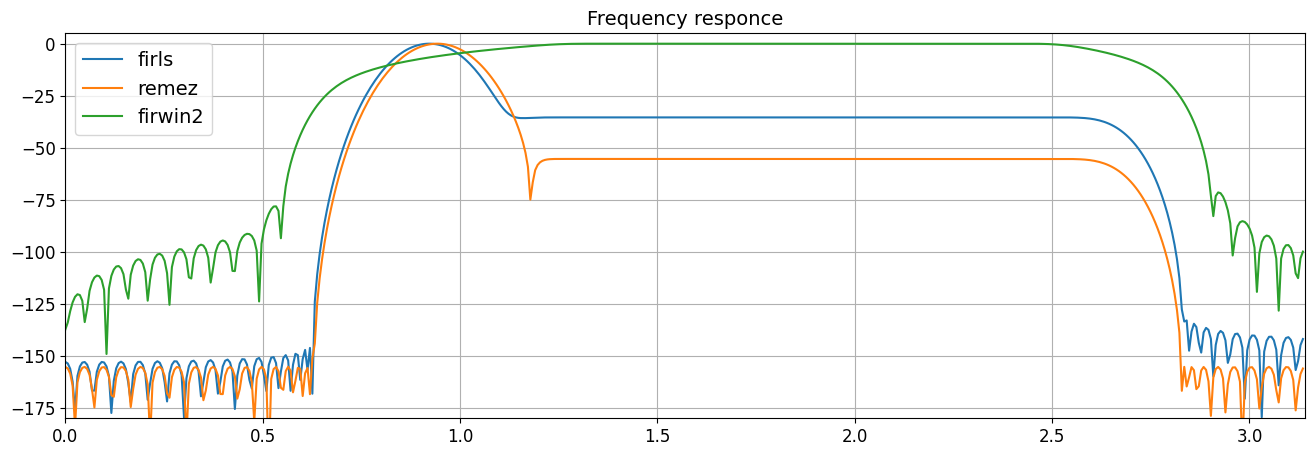

In [9]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

Kode di atas membandingkan respons frekuensi dari tiga filter FIR yang dibuat menggunakan metode Firls, Remez, dan Firwin2. Filter-filter ini dirancang untuk menyesuaikan karakteristik respons frekuensi 10, yang didefinisikan oleh parameter-parameter seperti panjang filter (N) sebesar 100, target gain (0, 0, 1, 1, 0, 0), dan frekuensi-frekuensi band yang diinginkan (0, 1, 2, 4, 4.5, 5). Plot menampilkan respons frekuensi dari masing-masing filter dalam skala dB, di mana sumbu x menunjukkan frekuensi dalam rentang 0 hingga pi (folding frequency), sedangkan sumbu y menunjukkan gain dalam dB. Ini membantu dalam membandingkan kinerja relatif dari ketiga metode desain filter FIR yang berbeda.

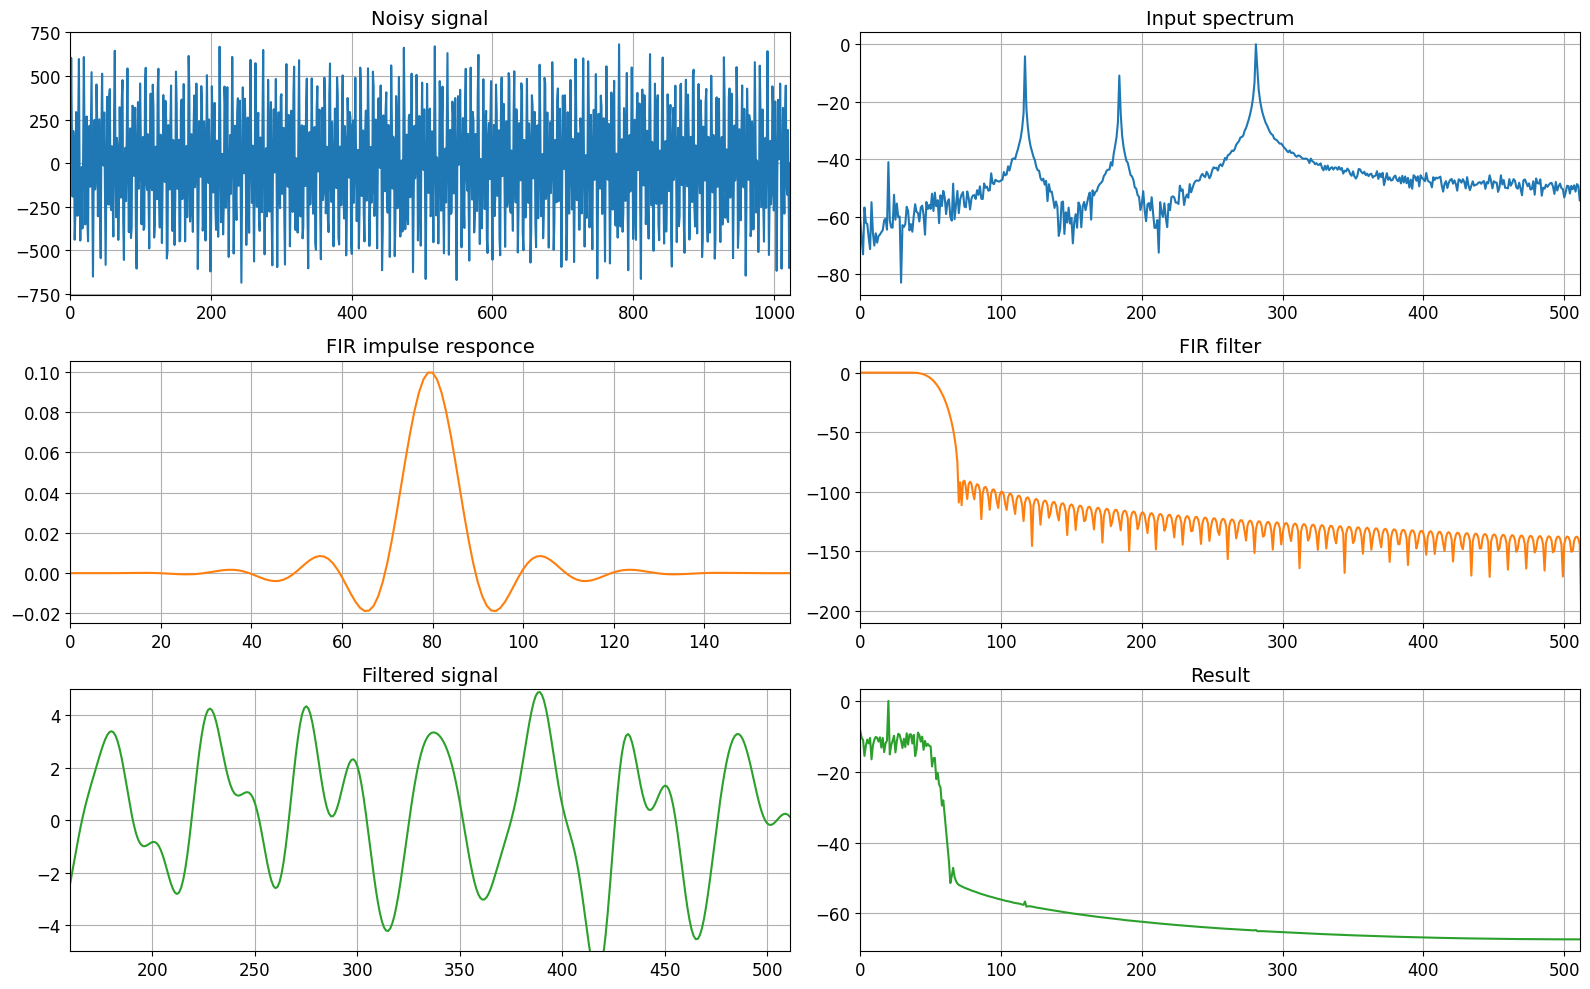

In [10]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Program di atas mensimulasikan proses penghilangan noise dari sinyal menggunakan filter FIR. Sinyal input \( x \) terdiri dari beberapa komponen sinusoidal dengan tambahan white noise. Filter FIR dengan koefisien \( h \) dirancang menggunakan metode Kaiser dengan panjang filter sebanyak 160. Plot yang dihasilkan terdiri dari dua subplot: subplot pertama menampilkan sinyal input, respons impuls filter FIR, dan sinyal hasil filtrasi, sementara subplot kedua menampilkan FFT dari masing-masing sinyal tersebut. Dengan demikian, plot memberikan perbandingan visual antara sinyal asli, respons impuls filter FIR, dan sinyal hasil filtrasi, serta spektrum frekuensi masing-masing.

Program di atas memiliki beberapa langkah:

1. Membuat sinyal input \( x \) dengan menggunakan beberapa komponen sinusoidal yang berbeda dengan frekuensi yang telah ditentukan. Sinyal ini diwakili oleh variabel \( t \) yang dibuat menggunakan `np.linspace(0, 1, N, endpoint=True)`, di mana \( N \) adalah panjang sinyal.

2. Menambahkan sedikit derau putih ke dalam sinyal input menggunakan `np.random.randn(N)`.

3. Merancang filter FIR dengan metode Kaiser menggunakan `firwin` dengan jumlah taps sebanyak 160 dan lebar band 0.1. Filter FIR ini direpresentasikan oleh koefisien \( h \).

4. Menerapkan filter FIR ke sinyal input menggunakan `lfilter`, menghasilkan sinyal yang difilter \( y \).

5. Menyiapkan daftar sinyal input yang akan diproses, termasuk sinyal asli, koefisien filter FIR, dan hasil sinyal yang telah difilter.

6. Membuat judul-judul yang sesuai untuk setiap plot yang akan dihasilkan.

7. Membuat figure dengan ukuran 16x10, kemudian melakukan loop untuk memplot setiap sinyal dan spektrumnya.

8. Pada setiap iterasi loop:
   - Menghitung transformasi Fourier dari sinyal menggunakan `np.abs(fft(lst_sig[i], N))`.
   - Mengkonversi hasil transformasi Fourier ke dalam skala dB menggunakan `20*np.log10()`.
   - Memplot sinyal dan spektrumnya dalam dua subplot yang terpisah.

9. Menyempurnakan tata letak plot menggunakan `plt.tight_layout()`.

Program ini secara keseluruhan merancang, menerapkan filter FIR, dan memplot sinyal input, koefisien filter, dan hasil filtering serta spektrumnya dalam bentuk subplot. Hal ini membantu dalam memvisualisasikan pengaruh filter FIR terhadap sinyal input.